In [1]:
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from setfit import SetFitModel

In [30]:
class Relation:
    def __init__(self, source, target, rel_type=None, relation_method=None):
        self.source = source
        self.target = target
        self.rel_type = rel_type
        self.relation_method = relation_method

    def __repr__(self):
        return f"<Relation(source mention='{self.source.text}', target mention='{self.target.text}', relation type='{self.rel_type}', relation method='{self.relation_method}')>"

In [34]:
class Keyword:
    def __init__(self, text, extraction_method=None, ini=None, fin=None, score=None, label=None, categorization_method=None):
        """
        Initializes a Keyword object with the provided attributes.

        Parameters:
        text (str): The extracted keyword text. It must be provided.
        extraction_method (str): The extraction method used to find the keyword. Default: None.
        ini (int): The starting index of the keyword in the input text. Default: None.
        fin (int): The ending index of the keyword in the input text. Default: None.
        score (float): The relevance score of the keyword. Default: None.
        label (list): List of labels associated with the mention. Default: None.
        categorization_method (str): The categorization menthod used to categorize the keyword. Default: None.
        """
        self.text = text
        self.extraction_method = extraction_method
        self.score = score
        self.span = [ini, fin]
        self.label = label
        self.categorization_method = categorization_method

    def __repr__(self):
        """
        Returns a string representation of the Keyword object.

        Returns:
        str: A string representing the Keyword object.
        """
        return f"<Keyword(text='{self.text}', span='{self.span}', extraction method='{self.extraction_method}', score='{self.score}', categorization method='{self.categorization_method}', class='{self.label}')>"



In [2]:
class Relator:
    def __init__(self, n, threshold, model_path):
        self.n = n
        self.threshold = threshold
        self.labels = ['BROAD','EXACT','NARROW']
        self.model = self.initialize_pretrained_model(model_path)

In [41]:
class SetFitRelator(Relator):
    def __init__(self, n, threshold, model_path):
        super().__init__(n, threshold, model_path)
    
    def initialize_pretrained_model(self, model_path):
        if model_path is None:
            path = '/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/setfit_rel1'
            model = SetFitModel.from_pretrained(path)
        else:
            model = SetFitModel.from_pretrained(model_path)
        return model

    def compute_relation(self, source, target):
        final_labels = list()
        mentions = list()
        for i in range(len(source)):
            mentions.append(source[i].text + " </s> " + target[i].text)
        embeddings = self.model.model_body.encode(mentions, normalize_embeddings=self.model.normalize_embeddings, convert_to_tensor=True)
        predicts = self.model.model_head.predict_proba(embeddings)
        for j in range(len(predicts[0])):
            predscores = {self.labels[i]: arr[:,1].tolist()[j] for i, arr in enumerate(predicts)}
            top_n_labels = sorted(predscores, key=predscores.get, reverse=True)[:self.n]
            filtered_labels = [label for label in top_n_labels if predscores[label] > self.threshold]
            final_labels.append(filtered_labels)
        return final_labels

In [ ]:
self.relations = [Relation(source[i],target[i],self.rel_extractor.compute_relation(source[i].text, target[i].text), self.relation_method) for i in range(len(source))]

In [42]:
a = [Keyword("cancer"),Keyword("cancer de pulmon")]
b=[Keyword("cancer de mama"),Keyword("cancer de pulmon")]
rel_extractor = SetFitRelator(n=1, threshold=0.5, model_path=None)
rel_extractor.compute_relation(a,b)

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[['NARROW'], ['NARROW']]

In [28]:
rel_extractor = SetFitRelator(n=1, threshold=0.5, model_path=None)
rel_extractor.compute_relation("cancer","cancer de mama")

[array([[0.99319609, 0.00680391],
       [0.99319609, 0.00680391]]), array([[0.99520552, 0.00479448],
       [0.99520552, 0.00479448]]), array([[0.0241001, 0.9758999],
       [0.0241001, 0.9758999]])]
range(0, 2)
{'BROAD': 0.006803911390384226, 'EXACT': 0.004794477677331413, 'NARROW': 0.9758999014815095}


/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputClassifier from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['NARROW']

In [16]:
class TransformersRelator2(Relator):
    def __init__(self, n, threshold, model_path):
        super().__init__(n, threshold, model_path)
        
    def initialize_pretrained_model(self, model_path):
        self.mlb = MultiLabelBinarizer()
        self.mlb.fit([self.labels])
        path = '/mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_noparents_1epoch'
        self.tokenizer = AutoTokenizer.from_pretrained(path)
        if model_path is None:
            path = '/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/transformers_rel1'        
            model = AutoModelForSequenceClassification.from_pretrained(path)
        else:
            model = AutoModelForSequenceClassification.from_pretrained(model_path)
        return model

    def compute_relation(self, source, target):
        final_labels = list()
        tokenized_mention = self.tokenizer(source, target, return_tensors='pt', padding=True, truncation=True)
        with torch.no_grad():
            output = self.model(**tokenized_mention)
        logits = output.logits
        for i in range(len(logits.tolist())):
            predscores = {label: score for label, score in zip(self.labels, logits.tolist()[i])}
            top_n_labels = sorted(predscores, key=predscores.get, reverse=True)[:self.n]
            filtered_labels = [label for label in top_n_labels if predscores[label] > self.threshold]
            final_labels.append(filtered_labels)
        return final_labels

In [17]:
rel_extractor = TransformersRelator2(n=1, threshold=-1, model_path=None)
rel_extractor.compute_relation(["cancer","cancer de mama","pulmon izquierdo"],["cancer de pulmon","cancer de mama","pulmon"])

[['BROAD'], ['BROAD'], ['NARROW']]

In [1]:
import pandas as pd

file_path = '/mnt/c/Users/Sergi/Desktop/BSC/traindata_classification.tsv'
traindata = pd.read_csv(file_path, sep='\t')
traindata = traindata.sample(frac=1, random_state=42)
traindata_head = traindata.head(100)
traindata_head = traindata_head[traindata_head["label"].isin(["SINTOMA","ENFERMEDAD","SPECIES","PROCEDIMIENTO"])]

file_path = '/mnt/c/Users/Sergi/Desktop/BSC/testdata_classification.tsv'
testdata = pd.read_csv(file_path, sep='\t')
testdata = testdata.sample(frac=1, random_state=42)
testdata_head = testdata.head(30)
testdata_head = testdata_head[testdata_head["label"].isin(["SINTOMA","ENFERMEDAD","SPECIES","PROCEDIMIENTO"])]

train_df = traindata_head
test_df = testdata_head
testdata_head

,filename,label,text,span
17736,es-S1130-05582014000300006-1,PROCEDIMIENTO,parotidectomía,"1444, 1458"
15340,es-S0210-48062005000400012-1,PROCEDIMIENTO,ecografía,"862, 871"
19857,es-S1130-01082010000700014-1#574#590,SINTOMA,microhemorragias,NaN
4475,caso_clinico_medicina_interna484,SPECIES,Chlamydophila,"360, 373"
1457,es-S1130-05582013000400005-1,ENFERMEDAD,parálisis del nervio motor ocular común izquierdo,"1620, 1669"
2209,es-S1130-05582015000100004-1,ENFERMEDAD,mucosa bucal derecha se observa una lesión tum...,"505, 555"
19211,es-S0210-48062004000500009-1#765#777,SINTOMA,asintomático,NaN
16497,es-S0376-78922011000100010-1,PROCEDIMIENTO,estudio de colon por enema opaco,"645, 677"
20594,es-S0365-66912007000100010-1#1149#1200,SINTOMA,retracción palpebral superior de 3 mm en ambos...,NaN
16153,es-S1137-66272016000200010-1,PROCEDIMIENTO,test de sangre oculta en heces,"203, 233"


In [77]:
new_row = {"filename":["es-S1130-05582014000300006-1"],"label":["SINTOMA"],"text":["parotidectomía"],"span":["1444, 1458"]}
new_row = pd.DataFrame(new_row)
testdata_head = pd.concat([testdata_head, new_row], ignore_index=True)
testdata_head

,filename,label,text,span
0,es-S1130-05582014000300006-1,PROCEDIMIENTO,parotidectomía,"1444, 1458"
1,es-S0210-48062005000400012-1,PROCEDIMIENTO,ecografía,"862, 871"
2,es-S1130-01082010000700014-1#574#590,SINTOMA,microhemorragias,NaN
3,caso_clinico_medicina_interna484,SPECIES,Chlamydophila,"360, 373"
4,es-S1130-05582013000400005-1,ENFERMEDAD,parálisis del nervio motor ocular común izquierdo,"1620, 1669"
5,es-S1130-05582015000100004-1,ENFERMEDAD,mucosa bucal derecha se observa una lesión tum...,"505, 555"
6,es-S0210-48062004000500009-1#765#777,SINTOMA,asintomático,NaN
7,es-S0376-78922011000100010-1,PROCEDIMIENTO,estudio de colon por enema opaco,"645, 677"
8,es-S0365-66912007000100010-1#1149#1200,SINTOMA,retracción palpebral superior de 3 mm en ambos...,NaN
9,es-S1137-66272016000200010-1,PROCEDIMIENTO,test de sangre oculta en heces,"203, 233"


https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForSequenceClassification

In [39]:
from transformers import AutoConfig, AutoModelForSequenceClassification

# Download configuration from huggingface.co and cache.
config = AutoConfig.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_config(config)

In [3]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_fscore_support
from datasets import Dataset

In [4]:
def prepare_data(trainset, testset):
    trainY=[]
    testY=[]
    for index, row in trainset.iterrows():
        trainY.append({row["label"]})
    for index, row in testset.iterrows():
        testY.append({row["label"]})
    mlb = MultiLabelBinarizer()
    mlb.fit_transform(trainY)
    all_labels = [i for i in mlb.classes_]
    train_dataset = Dataset.from_dict({"text": trainset['text'], "labels": mlb.fit_transform(trainY)})
    test_dataset = Dataset.from_dict({"text": testset['text'], "labels": mlb.fit_transform(testY)})
    return train_dataset, test_dataset

In [5]:
def compute_metrics(y_pred, y_test):
    return {
        "f1": multilabel_f1_metric.compute(predictions=y_pred, references=y_test, average="micro")["f1"],
        "accuracy": multilabel_accuracy_metric.compute(predictions=y_pred, references=y_test)["accuracy"],
        "No labels": indices_with_no_labels.tolist()
    }

In [6]:
from transformers import AutoTokenizer
import torch
from datasets import Dataset

path = '/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/noparents_sp'
tokenizer = AutoTokenizer.from_pretrained(path)

train_dataset, test_dataset = prepare_data(traindata_head, testdata_head)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████████████████████████| 42/42 [00:00<00:00, 557.10 examples/s]


In [2]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Step 1: Preprocess your data
# Assuming you have a train and test DataFrame with columns 'mentions' and 'labels'

# Initialize a tokenizer and tokenize the data
path = '/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/noparents_sp'
#tokenizer = AutoTokenizer.from_pretrained(path)

def tokenize_data(data_df):
    return tokenizer(list(data_df['text']), padding=True, truncation=True, return_tensors='pt'), \
           list(data_df["label"])
           #torch.tensor(list(data_df['label']))

def generate_embeddings(mentions):
    tokenized_inputs = tokenizer(mentions, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokenized_inputs)
    embeddings = outputs.last_hidden_state
    return embeddings[:, 0, :]

#train_data, test_data = prepare_data(train_df, test_df)

# Step 2: Fine-tune the model
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Directory to save the model
    num_train_epochs=3,             # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    evaluation_strategy="epoch",    # Evaluation strategy
    logging_dir='./logs',           # Directory for storing logs
)

# Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(
    path,
    num_labels=3,
    problem_type="multi_label_classification",
)

# Create a Trainer for training
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

# Fine-tune the model
trainer.train()

# Step 3: Make predictions on the test data
# Generate predictions for the test data
predictions = trainer.predict(test_data)

# Assuming 'predictions' is a tuple with the first element containing predicted labels
predicted_labels = predictions[0]

# Convert the predicted labels to a DataFrame if needed
predicted_df = pd.DataFrame({'predicted_labels': predicted_labels})

# You can now merge 'predicted_df' with your test DataFrame to associate predictions with original data if needed.
result_df = pd.concat([test_df, predicted_df], axis=1)

result_df

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/noparents_sp and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

KeyboardInterrupt



In [3]:
import pandas as pd
import torch
from sklearn.preprocessing import MultiLabelBinarizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

model_path = '/mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/noparents_sp'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=4, problem_type="multi_label_classification")

# Tokenize text data
tokenized_data = tokenizer(list(traindata_head["text"]), truncation=True, padding=True, return_tensors="pt", max_length=512)

# Convert labels to tensors
label_strings = traindata_head["label"].values.tolist()
label_strings = [[i] for i in label_strings]
# Split the labels into a list
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(label_strings)
# Convert labels to tensors
labels = torch.tensor(labels, dtype=torch.float32)

from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(tokenized_data.input_ids, tokenized_data.attention_mask, labels)
#train_loader = DataLoader(dataset, batch_size=32, shuffle=True)  # Adjust batch_size as needed

training_args = TrainingArguments(
    output_dir="./output",  # Output directory
    num_train_epochs=3,     # Number of training epochs
    per_device_train_batch_size=32,  # Batch size per device
    evaluation_strategy="steps",  # Evaluate every steps
    save_steps=500,  # Save checkpoint every 500 steps
    save_total_limit=2,  # Only keep the last 2 checkpoints
    load_best_model_at_end=True,  # Load the best model at the end of training
)

def collate_fn(batch):
    return {
        'input_ids': torch.stack([item[0] for item in batch]),
        'attention_mask': torch.stack([item[1] for item in batch]),
        'labels': torch.stack([item[2] for item in batch])
    }

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,  # You can customize data collation if needed
    train_dataset=dataset,
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /mnt/c/Users/Sergi/Desktop/BSC/modelos_entrenados/noparents_sp and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=6, training_loss=0.6598567962646484, metrics={'train_runtime': 21.4778, 'train_samples_per_second': 7.543, 'train_steps_per_second': 0.279, 'total_flos': 1498526591328.0, 'train_loss': 0.6598567962646484, 'epoch': 3.0})

In [8]:
tokenized_data = tokenizer(list(testdata_head["text"]), truncation=True, padding=True, return_tensors="pt", max_length=512)

# Convert labels to tensors
label_strings = testdata_head["label"].values.tolist()
label_strings = [[i] for i in label_strings]
# Split the labels into a list
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(label_strings)
labels_test = labels
# Convert labels to tensors
labels = torch.tensor(labels, dtype=torch.float32)

dataset = TensorDataset(tokenized_data.input_ids, tokenized_data.attention_mask, labels)
#test_loader = DataLoader(dataset, batch_size=32, shuffle=True)  # Adjust batch_size as needed

results = trainer.evaluate(eval_dataset=dataset)

In [152]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Assuming you have already created your Trainer object 'trainer' and test DataLoader 'test_loader'

# Evaluate the model and get predictions
results = trainer.predict(dataset)

#predicted labels
print(results.prediction)
max_indices = np.argmax(results.predictions, axis=1)
print(max_indices)
preds = np.zeros_like(results.predictions)
preds[np.arange(len(max_indices)), max_indices] = 1
print(preds, results.label_ids)
# Calculate F1-score
f1 = f1_score(preds, results.label_ids, average="micro")  # You can choose other average options as needed

# Calculate accuracy
accuracy = accuracy_score(preds, results.label_ids)

# Print the calculated metrics
print("F1-score:", f1)
print("Accuracy:", accuracy)

<class 'numpy.ndarray'> [[0. 0. 0. 0.]]
F1-score: 0.0
Accuracy: 0.0


In [10]:
#all_labels =['ACTIVIDAD', 'COMUNIDAD', 'DEPARTAMENTO', 'ENFERMEDAD', 'FAC_GEN','FAC_NOM', 'FARMACO', 'GEO_GEN', 'GEO_NOM', 'GPE_GEN', 'GPE_NOM','HUMAN', 'IDIOMA', 'MORFOLOGIA_NEOPLASIA', 'NO_CATEGORY','PROCEDIMIENTO', 'PROFESION', 'SINTOMA', 'SITUACION_LABORAL','SPECIES', 'TRANSPORTE']
all_labels = sorted(["SINTOMA","ENFERMEDAD","SPECIES","PROCEDIMIENTO"])
mlb = MultiLabelBinarizer()
labels = mlb.fit([all_labels])
print(mlb.transform([["SPECIES"]]))
print(mlb.classes_)

[[0 0 0 1]]
['ENFERMEDAD' 'PROCEDIMIENTO' 'SINTOMA' 'SPECIES']


In [39]:
import numpy as np
a = ["fiebre"]
tokenized_data = tokenizer(a, truncation=True, padding=True, return_tensors="pt", max_length=512)
# Convert labels to tensors
label_strings = [[" "]]
#label_strings = [[i] for i in label_strings]
# Split the labels into a list

labels = mlb.transform(label_strings)
labels_test = labels
# Convert labels to tensors
labels = torch.tensor(labels, dtype=torch.float32)


dataset = TensorDataset(tokenized_data.input_ids, tokenized_data.attention_mask, labels)
results = trainer.predict(dataset)

print(results.predictions)
max_indices = np.argmax(results.predictions, axis=1)
print(max_indices)
preds = np.zeros_like(results.predictions)
print(preds)
if (sum(sum(results.predictions > 0.26))):
    preds[np.arange(len(max_indices)), max_indices] = 1
print(preds)
print("\n")
print(results.predictions.tolist()[0])
predscores = {label: score for label, score in zip(all_labels, results.predictions.tolist()[0])}
top_n_labels = sorted(predscores, key=predscores.get, reverse=True)[:1]
filtered_labels = [label for label in top_n_labels if predscores[label] > -1]
print(filtered_labels)

[[-0.13217705 -0.30603853  0.25003457 -0.31758073]]
[2]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]


[-0.13217705488204956, -0.3060385286808014, 0.2500345706939697, -0.3175807297229767]
['SINTOMA']


In [81]:
a = mlb.inverse_transform(preds)
print(a[0][0])

PROCEDIMIENTO


In [6]:
trainer.train.__code__.co_varnames

('self',
 'resume_from_checkpoint',
 'trial',
 'ignore_keys_for_eval',
 'kwargs',
 'args',
 'model_reloaded',
 'inner_training_loop')

In [1]:
import spacy

# Load the spaCy language model for Spanish
nlp = spacy.load("es_core_news_sm")

# Input text in Spanish
text = "Esta es una oración de ejemplo con algunos sustantivos y adjetivos."

# Process the text with spaCy
doc = nlp(text)

# Initialize variables for storing the POS pattern
pos_pattern = []

# Iterate through tokens and get their POS tags
for token in doc:
    pos_pattern.append(token.pos_)

# Convert the list of POS tags to a string
pos_pattern_str = ''.join(pos_pattern)

print("POS Pattern:", pos_pattern_str)


POS Pattern: PRONAUXDETNOUNADPNOUNADPDETADJCCONJADJPUNCT


In [3]:
import pandas as pd
file_path = '/mnt/c/Users/Sergi/Desktop/BSC/traindata_classification.tsv'
traindata = pd.read_csv(file_path, sep='\t')

import spacy
nlp = spacy.load("es_core_news_sm")
pos_pattern = dict()

for idx, row in traindata.iterrows():
    doc = nlp(row["text"])
    pos = []
    for token in doc:
        pos.append(token.pos_)
    pos = '-'.join(pos)
    if pos in pos_pattern:
        pos_pattern[pos] += 1
    else:
        pos_pattern[pos] = 1

print(pos_pattern)

{'NOUN': 14240, 'ADJ': 9763, 'VERB-ADJ': 421, 'NOUN-ADV-PROPN-ADJ-ADJ-DET-NOUN-ADJ': 1, 'NOUN-ADJ-ADP-ADJ': 9, 'NOUN-VERB': 330, 'NOUN-ADJ': 8253, 'NOUN-ADP-DET-NOUN-ADJ': 318, 'NOUN-ADJ-ADJ': 1097, 'VERB-ADJ-ADP-NOUN-ADJ': 16, 'PROPN-ADJ': 845, 'NOUN-ADJ-ADP-DET-NOUN': 103, 'VERB': 3032, 'NOUN-ADJ-ADP-PROPN-ADP-NOUN-ADJ': 1, 'ADJ-ADP-DET-NOUN-ADJ': 21, 'NOUN-ADJ-ADP-DET-NOUN-ADP-NOUN': 12, 'NOUN-ADJ-ADP-NOUN-ADJ-ADJ': 32, 'NOUN-ADJ-CCONJ-ADJ-ADP-DET-NOUN': 2, 'NOUN-ADP-DET-NOUN-ADJ-ADJ-CCONJ-ADP-DET-NOUN-PRON-VERB-ADJ-ADJ-NOUN': 1, 'NOUN-ADJ-ADP-NOUN-VERB': 16, 'NOUN-ADP-DET-ADJ-ADJ': 8, 'NOUN-ADP-NOUN-ADJ': 1108, 'NOUN-ADJ-ADJ-NOUN': 3, 'NOUN-ADP-NOUN-ADJ-CCONJ-ADJ': 21, 'ADJ-NOUN-ADV-ADJ': 5, 'NOUN-ADJ-PROPN-NUM-ADJ-ADP-DET-PROPN': 1, 'NOUN-ADJ-PUNCT-ADJ-PUNCT-VERB-ADP-NOUN-CCONJ-NOUN': 1, 'NOUN-ADP-NOUN': 1730, 'NOUN-ADJ-CCONJ-ADJ-ADV-SCONJ-NOUN': 1, 'ADJ-ADP-DET-NOUN-ADJ-NOUN': 2, 'NOUN-ADJ-ADJ-ADJ-ADP-NOUN-ADJ-ADJ-PUNCT-PROPN-PUNCT-ADJ-ADJ': 1, 'NOUN-ADJ-ADJ-ADP-NOUN-ADJ-ADJ-ADP-

In [25]:
filtered_pos_pattern = {key: value for key, value in pos_pattern.items() if value > 100}
sorted_pos_pattern = dict(sorted(filtered_pos_pattern.items(), key=lambda item: item[1], reverse=True))
print(sorted_pos_pattern)
print(len(sorted_pos_pattern))

{'NOUN': 14240, 'ADJ': 9763, 'NOUN-ADJ': 8253, 'PROPN': 6660, 'VERB': 3032, 'NOUN-ADP-NOUN': 1730, 'NOUN-ADP-NOUN-ADJ': 1108, 'NOUN-ADJ-ADJ': 1097, 'PROPN-PROPN': 1055, 'PROPN-ADJ': 845, 'PROPN-VERB': 571, 'NOUN-ADP-PROPN': 552, 'ADJ-ADJ': 481, 'VERB-ADJ': 421, 'PROPN-ADP-PROPN': 398, 'NOUN-ADJ-ADP-NOUN': 331, 'NOUN-VERB': 330, 'NOUN-ADP-DET-NOUN-ADJ': 318, 'NOUN-ADJ-ADP-NOUN-ADJ': 304, 'NOUN-PROPN': 237, 'NOUN-ADP-DET-NOUN': 236, 'ADJ-ADP-NOUN': 226, 'PROPN-ADP-PROPN-PROPN': 183, 'ADJ-ADP-NOUN-ADJ': 182, 'PROPN-NOUN': 174, 'ADV': 170, 'ADJ-NOUN-ADJ': 152, 'ADJ-NOUN': 151, 'NOUN-NOUN': 149, 'INTJ': 142, 'VERB-VERB': 136, 'NOUN-ADP-PROPN-PROPN': 132, 'NOUN-ADP-NOUN-ADP-NOUN': 131, 'PROPN-AUX': 127, 'VERB-ADP-NOUN': 117, 'ADV-ADJ': 114, 'NUM': 109, 'ADJ-ADP-PROPN': 104, 'NOUN-ADJ-ADP-DET-NOUN': 103, 'NOUN-ADJ-ADJ-ADJ': 103, 'NOUN-ADJ-ADP-DET-NOUN-ADJ': 101, 'ADJ-ADP-PROPN-PROPN': 101}
42


In [ ]:
((<NOUN.*>|<PROPN.*>)(<ADJ.*>|<ADP.*><NOUN.>|<ADP.*><PROPN.>)*)|(<VERB.*>+)

USANDO POS

A: "<NOUN.*>*<ADP.*>*<NOUN.*>*<ADJ.*>*|<PROPN.*>+|<VERB.*>+" tots els >1000

B: "(<NOUN.*>(<ADJ.*>|<ADP.*><NOUN.>)*)|(<PROPN.*>+)|(<VERB.*>+)" tots els >1000 i mes

C: "<NOUN.*>*<ADP.*>*<NOUN.*>*<ADJ.*>*"

D: "((<NOUN.*>|<PROPN.*>)(<ADJ.*>|<ADP.*><NOUN.>|<ADP.*><PROPN.>)*)|(<VERB.*>+)" casi tots els >300

E: "((<NOUN.*>|<PROPN.*>)(<ADJ.*>|<ADP.*><NOUN.>|<ADP.*><PROPN.>)*)" casi tots >300 sense verbs

F: "(<NOUN.*>(<ADJ.*>|<ADP.*><NOUN.>)*)|(<PROPN.*>+)" tots >1000 sense verbs

G: "((<NOUN.*>|<PROPN.*>)(<ADJ.*>|<ADP.*><NOUN.>|<ADP.*><PROPN.>)(<ADJ.*>|<ADP.*><NOUN.>|<ADP.*><PROPN.>|<DET.*><NOUN.>)*)|(<ADJ.*>+)(<NOUN.*>+)(<ADJ.*>+)|(<VERB.*>+)(<ADJ.*>+)|((<NOUN.*>|<PROPN.*>)<VERB.*>+)"

In [26]:
sorted_struct = list(sorted_pos_pattern)
print(sorted_struct)

['NOUN', 'ADJ', 'NOUN-ADJ', 'PROPN', 'VERB', 'NOUN-ADP-NOUN', 'NOUN-ADP-NOUN-ADJ', 'NOUN-ADJ-ADJ', 'PROPN-PROPN', 'PROPN-ADJ', 'PROPN-VERB', 'NOUN-ADP-PROPN', 'ADJ-ADJ', 'VERB-ADJ', 'PROPN-ADP-PROPN', 'NOUN-ADJ-ADP-NOUN', 'NOUN-VERB', 'NOUN-ADP-DET-NOUN-ADJ', 'NOUN-ADJ-ADP-NOUN-ADJ', 'NOUN-PROPN', 'NOUN-ADP-DET-NOUN', 'ADJ-ADP-NOUN', 'PROPN-ADP-PROPN-PROPN', 'ADJ-ADP-NOUN-ADJ', 'PROPN-NOUN', 'ADV', 'ADJ-NOUN-ADJ', 'ADJ-NOUN', 'NOUN-NOUN', 'INTJ', 'VERB-VERB', 'NOUN-ADP-PROPN-PROPN', 'NOUN-ADP-NOUN-ADP-NOUN', 'PROPN-AUX', 'VERB-ADP-NOUN', 'ADV-ADJ', 'NUM', 'ADJ-ADP-PROPN', 'NOUN-ADJ-ADP-DET-NOUN', 'NOUN-ADJ-ADJ-ADJ', 'NOUN-ADJ-ADP-DET-NOUN-ADJ', 'ADJ-ADP-PROPN-PROPN']


In [5]:
print("Total number of keywords: ", sum(pos_pattern.values()))
print("Taking >100 occurrences: ", sum(sorted_pos_pattern.values()))

Total number of keywords:  68878
Taking >100 occurrences:  54869


In [21]:
vals = [1,2,5,10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

In [22]:
import numpy as np
x = np.zeros((1,len(vals)))
y = np.zeros((1,len(vals)))
for i in range(len(vals)):
    filtered_pos_pattern = {key: value for key, value in pos_pattern.items() if value >= vals[i]}
    x[0,i] = len(filtered_pos_pattern)
    y[0,i] = sum(filtered_pos_pattern.values())

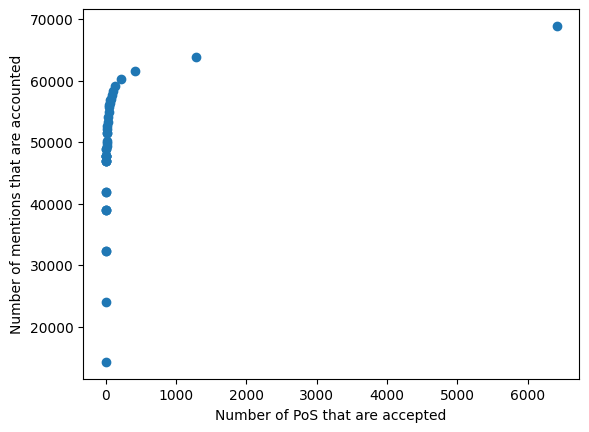

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('Number of PoS that are accepted')
plt.ylabel('Number of mentions that are accounted')
plt.show()

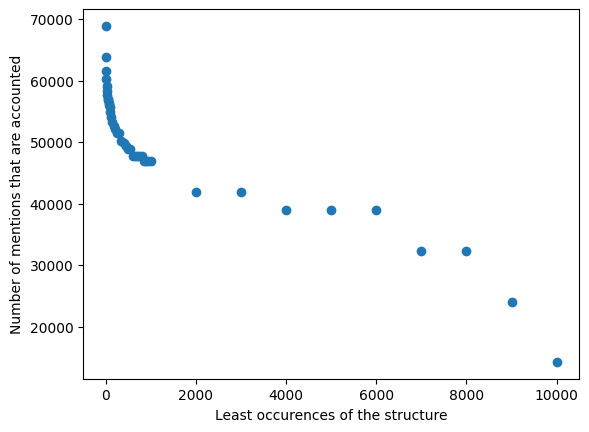

In [24]:
plt.scatter(vals, y)
plt.xlabel('Least occurences of the structure')
plt.ylabel('Number of mentions that are accounted')
plt.show()

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sergi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.corpus.stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [10]:
pip install keyphrase_vectorizers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import os

NameError: name '_C' is not defined

In [ ]:
import nltk
nltk.download('stopwords')

In [13]:
path = '/mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_parents_1epoch'

sentence_model = SentenceTransformer(path)
kw_model = KeyBERT(model=sentence_model)
texto1 = "Paciente varón de 35 años con tumoración en polo superior de teste derecho hallada de manera casual durante una autoexploración, motivo por el cual acude a consulta de urología donde se realiza exploración física, apreciando masa de 1cm aproximado de diámetro dependiente de epidídimo, y ecografía testicular, que se informa como lesión nodular sólida en cabeza de epidídimo derecho. Se realiza RMN. Confirmando masa nodular, siendo el tumor adenomatoide de epidídimo la primera posibilidad diagnóstica. Se decide, en los dos casos, resección quirúrgica de tumoración nodular en cola epidídimo derecho, sin realización de orquiectomía posterior. En ambos casos se realizó examen anátomopatológico de la pieza quirúrgica. Hallazgos histológicos macroscópicos: formación nodular de 1,5 cms (caso1) y 1,2 cms (caso 2) de consistencia firme, coloración blanquecina y bien delimitada. Microscópicamente se observa proliferación tumoral constituida por estructuras tubulares en las que la celularidad muestra núcleos redondeados y elongados sin atipia citológica y que ocasionalmente muestra citoplasmas vacuolados, todo ello compatible con tumor adenomatoide de epidídimo."

keywordsA = kw_model.extract_keywords(texto1, vectorizer=KeyphraseCountVectorizer(spacy_pipeline = "es_core_news_sm", stop_words=None, pos_pattern="<NOUN.*>*<ADP.*>*<NOUN.*>*<ADJ.*>*|<PROPN.*>+|<VERB.*>+"))
keywordsB = kw_model.extract_keywords(texto1, vectorizer=KeyphraseCountVectorizer(spacy_pipeline = "es_core_news_sm", stop_words='spanish', pos_pattern="<NOUN.*>*<ADP.*>*<NOUN.*>*<ADJ.*>*|<PROPN.*>+|<VERB.*>+"))
print(keywordsA, '\n', keywordsB)

No sentence-transformers model found with name /mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_parents_1epoch. Creating a new one with MEAN pooling.


[('en cola epidídimo derecho', 0.5785), ('de tumoración nodular', 0.5661), ('proliferación tumoral constituida', 0.5561), ('lesión nodular sólida', 0.5514), ('años con tumoración', 0.5404)] 
 [('en cola epidídimo derecho', 0.5785), ('de tumoración nodular', 0.5661), ('proliferación tumoral constituida', 0.5561), ('lesión nodular sólida', 0.5514), ('años con tumoración', 0.5404)]


In [4]:
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import os

/mnt/c/Users/Sergi/Documents/BioTermCategorizer/.env_biotermcategorizer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name '_C' is not defined

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
texto1 = "Paciente varón de 35 años con tumoración en polo superior de teste derecho hallada de manera casual durante una autoexploración, motivo por el cual acude a consulta de urología donde se realiza exploración física, apreciando masa de 1cm aproximado de diámetro dependiente de epidídimo, y ecografía testicular, que se informa como lesión nodular sólida en cabeza de epidídimo derecho. Se realiza RMN. Confirmando masa nodular, siendo el tumor adenomatoide de epidídimo la primera posibilidad diagnóstica. Se decide, en los dos casos, resección quirúrgica de tumoración nodular en cola epidídimo derecho, sin realización de orquiectomía posterior. En ambos casos se realizó examen anátomopatológico de la pieza quirúrgica. Hallazgos histológicos macroscópicos: formación nodular de 1,5 cms (caso1) y 1,2 cms (caso 2) de consistencia firme, coloración blanquecina y bien delimitada. Microscópicamente se observa proliferación tumoral constituida por estructuras tubulares en las que la celularidad muestra núcleos redondeados y elongados sin atipia citológica y que ocasionalmente muestra citoplasmas vacuolados, todo ello compatible con tumor adenomatoide de epidídimo."
path = '/mnt/c/Users/Sergi/Desktop/BSC/spanish_sapbert_models/sapbert_15_parents_1epoch'

sentence_model = SentenceTransformer(path)
kw_model = KeyBERT(model=sentence_model)
keywordsA = kw_model.extract_keywords(texto1, keyphrase_ngram_range=(1, 4), stop_words=None, use_mmr=True)
print(keywordsA)